In [18]:
import pathlib
import random
import itertools
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import networkx as nx

In [19]:
path = pathlib.Path("facebook")
G = nx.Graph()

for nombre in path.glob("*.edges"):
    with open(nombre) as archivo:
        contenidos = archivo.readlines()
        aristas = [tuple(map(int, renglon.split()))
                   for renglon in contenidos]
        G.add_edges_from(aristas)

In [20]:
print(len(G.nodes()))

3959


In [21]:
with open('facebook/0.edges') as archivo:
    contenidos = archivo.readlines()

In [22]:
aristas = [tuple(map(int, renglon.split()))
    for renglon in contenidos]
G = nx.Graph()
G.add_edges_from(aristas)

In [23]:
nx.average_clustering(G)

0.5082445417696639

In [24]:
cc = max(nx.connected_components(G), key=len)
G.remove_nodes_from(set(G)-cc)

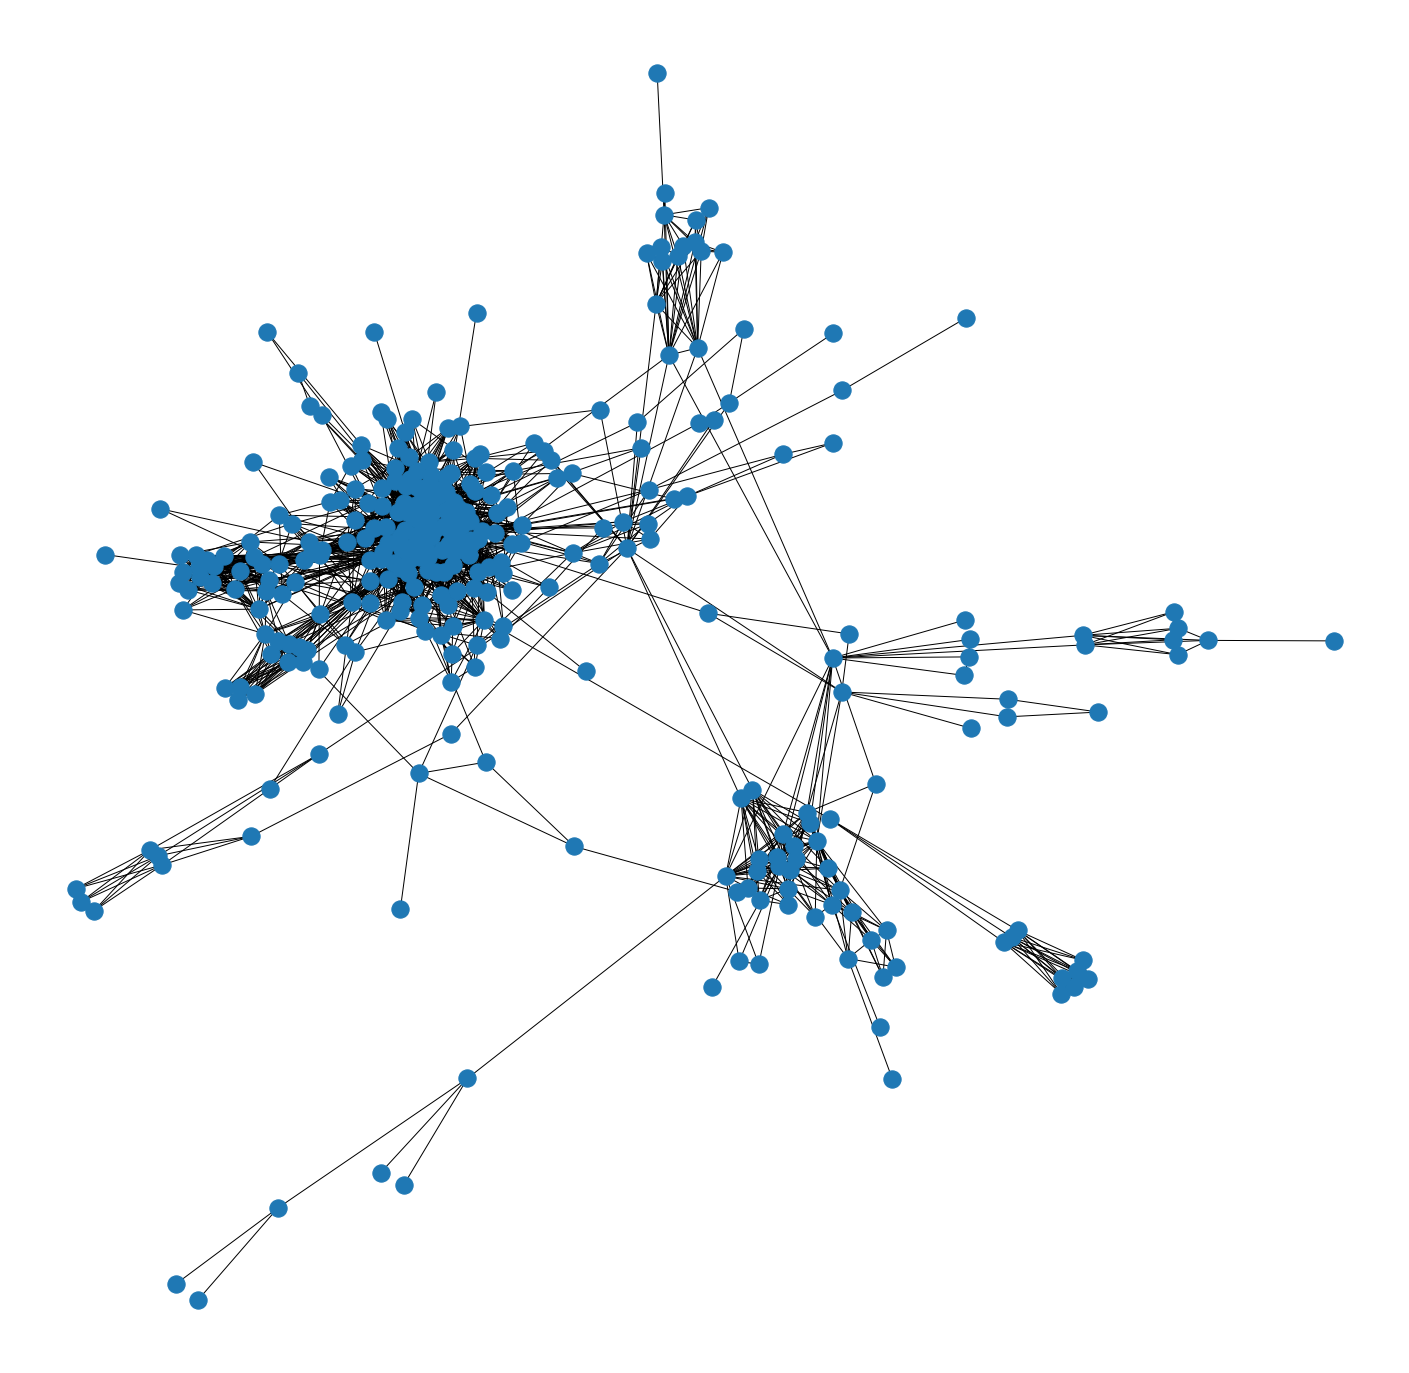

In [25]:
fig, ax = plt.subplots(figsize=(25,25))
nx.draw(G)

### Metodo de Monte Carlo para aproximar la distancia media

In [26]:
def estimar_distancia_media(G: nx.Graph, k: int=400) -> float:
    convinaciones = list(itertools.combinations(G.nodes,2))
    assert len(convinaciones) > k
    muestra = random.choices(convinaciones,k=k)
    distancias = [nx.shortest_path_length(G, cola, punta) for cola,punta in muestra]
    media = np.mean(distancias)
    stdev = np.std(distancias)
    return media, stdev

In [27]:
print("nodos:",len(G.nodes()))
print("aristas: ",len(G.edges()))
print("Convexo: ")
print("Coeficiente de agrupamiento: ", nx.average_clustering(G))

dist_media, stdev = estimar_distancia_media(G)
print("Distancia media: ", dist_media)
print("Desviación estandar: ", stdev)

nodos: 324
aristas:  2514
Convexo: 
Coeficiente de agrupamiento:  0.5223624457077101
Distancia media:  3.655
Desviación estandar:  1.6958699832239497


In [28]:
grados = G.degree()
print("El promedio de amistades de una persona es: ",np.mean(list(dict(grados).values())))

El promedio de amistades de una persona es:  15.518518518518519


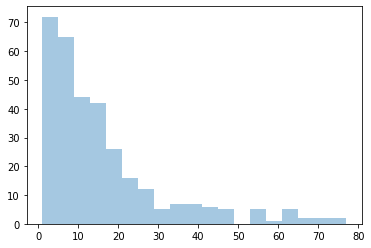

In [29]:
sns.distplot(list(dict(grados).values()), kde=False)

### Crear una grafo de Watss-Strogatz que sea similar a la red de Facebook.


- Para elegir el parametro k:

- k = $(aristas*2)/n$ = $42.88$

- Para elegir p :


In [30]:
Gws = nx.watts_strogatz_graph(3927, 43, .05)
print("nodos: ",len(Gws.nodes()))
print("aristas: ",len(Gws.edges()))
print("Convenxo: ")
print("Coeficiente de agrupamiento: ", nx.average_clustering(Gws))

dist_media, stdev = estimar_distancia_media(Gws)
print("Distancia media: ", dist_media)
print("Desviación estandar: ", stdev)

nodos:  3927
aristas:  82467
Convenxo: 
Coeficiente de agrupamiento:  0.6281791446969023
Distancia media:  3.3225
Desviación estandar:  0.5945534038250895


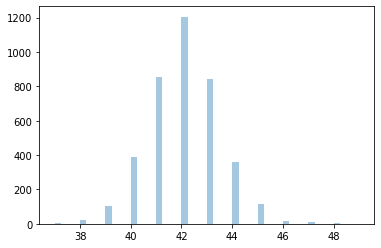

In [31]:
sns.distplot(list(dict(Gws.degree()).values()), kde=False)

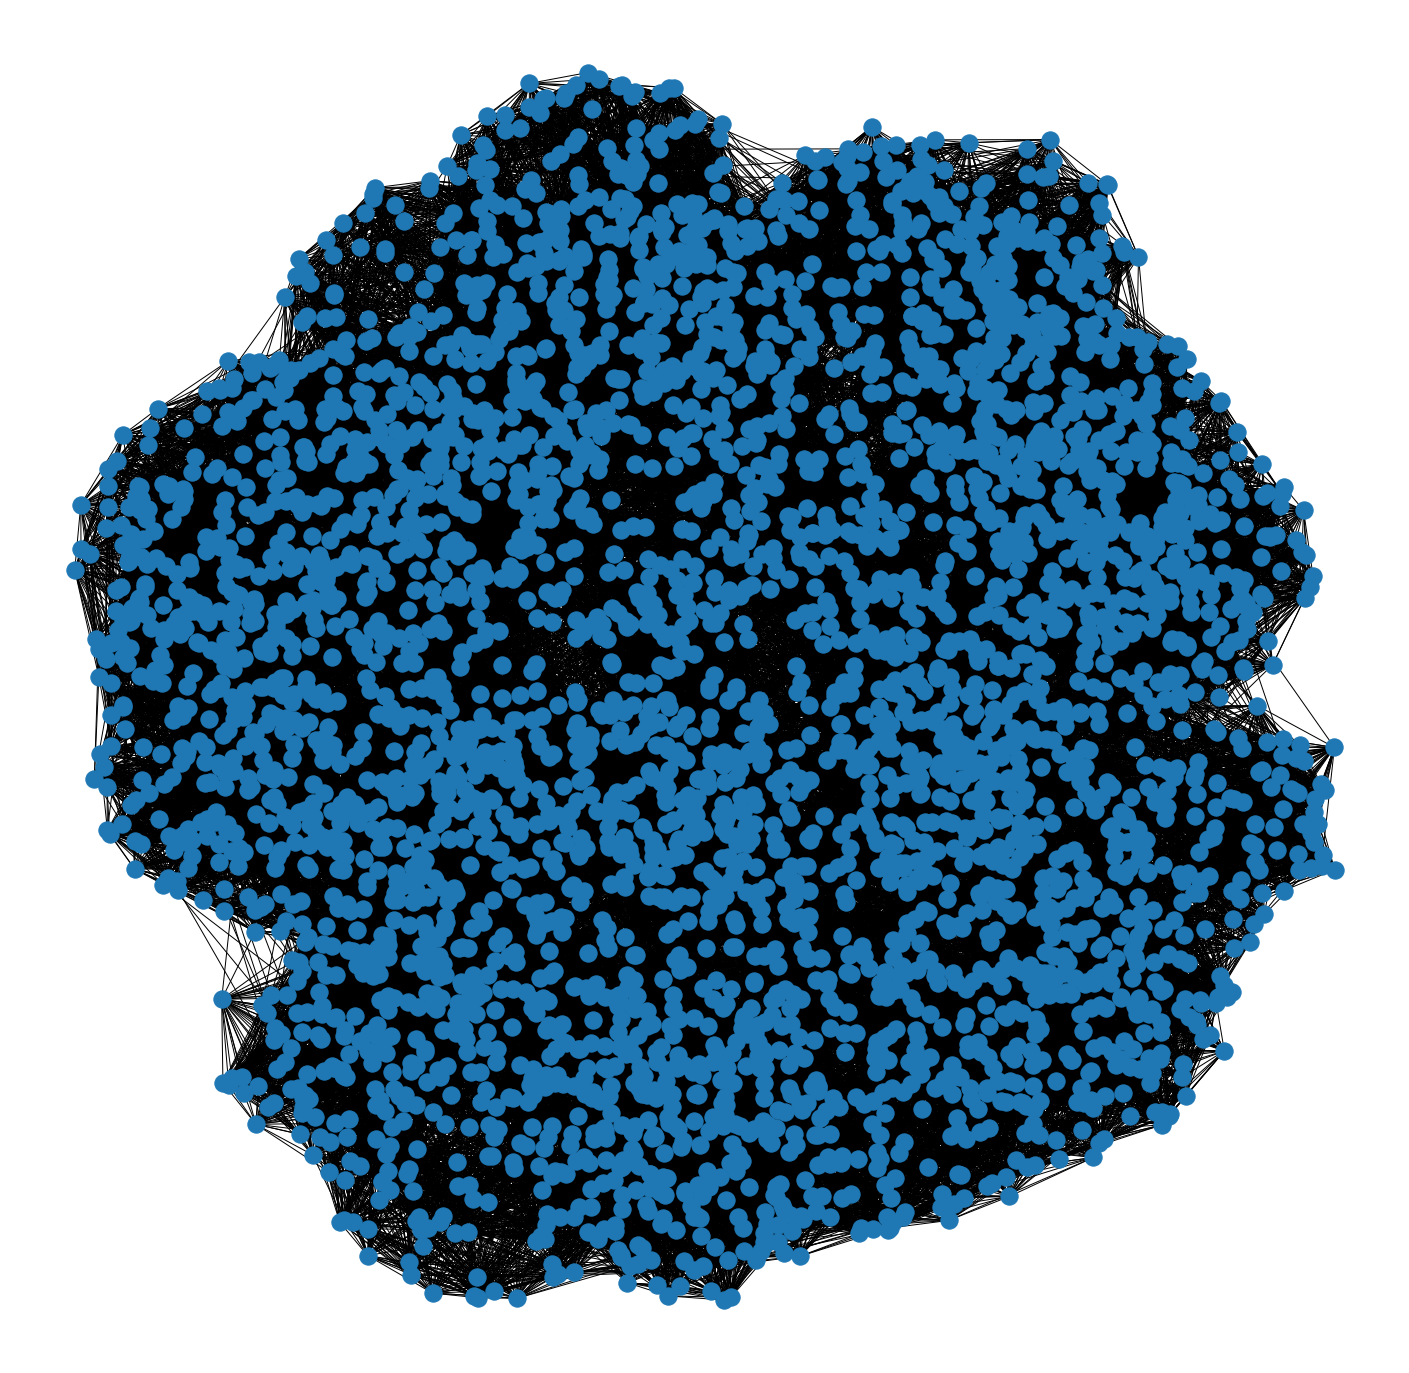

In [32]:
fig, ax = plt.subplots(figsize=(25,25))
nx.draw(Gws)

In [33]:
def ruleta(p):
    p = np.array(p)/np.sum(p)
    #sns.distplot(list(p), kde=False)
    r = random.random()
    
    for i,x in enumerate(np.cumsum(p)):
        if x>=r:
            return i
        return i

In [34]:
ruleta([20, 10, 5, 1, 1])

0

In [35]:
?nx.powerlaw_cluster_graph

Signature: nx.powerlaw_cluster_graph(n, m, p, seed=None)
Docstring:
Holme and Kim algorithm for growing graphs with powerlaw
degree distribution and approximate average clustering.

Parameters
----------
n : int
    the number of nodes
m : int
    the number of random edges to add for each new node
p : float,
    Probability of adding a triangle after adding a random edge
seed : integer, random_state, or None (default)
    Indicator of random number generation state.
    See :ref:`Randomness<randomness>`.

Notes
-----
The average clustering has a hard time getting above a certain
cutoff that depends on `m`.  This cutoff is often quite low.  The
transitivity (fraction of triangles to possible triangles) seems to
decrease with network size.

It is essentially the Barabási–Albert (BA) growth model with an
extra step that each random edge is followed by a chance of
making an edge to one of its neighbors too (and thus a triangle).

This algorithm improves on BA in the sense that it enables 